In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings, datetime
warnings.filterwarnings('ignore')
%matplotlib inline

## Import and prepare data

In [67]:
data = pd.read_csv('E:/Combined VBRK.txt')

In [68]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,20160719.0,,1.0,20160719.0
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,20160719.0,,1.0,20160719.0
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,20160927.0,,1.0,20160927.0
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,20161004.0,,1.0,20161004.0
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,20161025.0,,1.0,20161025.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191306 entries, 0 to 191305
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MANDT    191306 non-null  object 
 1   VBELN    191305 non-null  float64
 2   FKART    191305 non-null  object 
 3   FKTYP    191305 non-null  object 
 4   VBTYP    191305 non-null  object 
 5   WAERK    191305 non-null  object 
 6   BELNR    191305 non-null  object 
 7   GJAHR    191305 non-null  float64
 8   BUKRS    191305 non-null  object 
 9   NETWR    191305 non-null  float64
 10  KUNAG    191305 non-null  float64
 11  FKDAT    191305 non-null  float64
 12  BELNR.1  191305 non-null  object 
 13  KURRF    191305 non-null  float64
 14  ERDAT    191305 non-null  float64
dtypes: float64(7), object(8)
memory usage: 21.9+ MB


In [70]:
data.shape

(191306, 15)

In [71]:
# AS one of the data entry is empty we can just drop it
data.dropna(inplace = True)

In [72]:
# lim_data = data[datetime(2016,4,1):datetime(2021,2,1)]

In [73]:
# As we can see that dates have been written in float format so
# First convert dates in float to int
data['FKDAT'] = data['FKDAT'].apply(np.int64)
data['ERDAT'] = data['ERDAT'].apply(np.int64)

In [74]:
# Then convert it into Date format
data['FKDAT'] = pd.to_datetime(data['FKDAT'], format='%Y%m%d')
data['ERDAT'] = pd.to_datetime(data['ERDAT'], format = '%Y%m%d')

In [75]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,2016-07-19,,1.0,2016-07-19
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,2016-07-19,,1.0,2016-07-19
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,2016-09-27,,1.0,2016-09-27
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,2016-10-04,,1.0,2016-10-04
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,2016-10-25,,1.0,2016-10-25


In [76]:
data.drop(['MANDT','VBELN','FKART','FKTYP','VBTYP','WAERK','BELNR','GJAHR','BUKRS','KUNAG','FKDAT','BELNR.1','KURRF'] , axis = 1 , inplace = True)

In [77]:
data.head()

,NETWR,ERDAT
0,93927.0,2016-07-19
1,79938.0,2016-07-19
2,118851.0,2016-09-27
3,114889.0,2016-10-04
4,39617.0,2016-10-25


In [78]:
data.columns = ['Sales' , 'Date']

In [79]:
data.head()

,Sales,Date
0,93927.0,2016-07-19
1,79938.0,2016-07-19
2,118851.0,2016-09-27
3,114889.0,2016-10-04
4,39617.0,2016-10-25


In [80]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-12])  
data = data.groupby('Date')['Sales'].sum().reset_index()
data.head()

,Date,Sales
0,2016-04,1.194274e+09
1,2016-05,1.270143e+09
2,2016-06,1.341825e+09
3,2016-07,1.640480e+09
4,2016-08,1.586615e+09


In [81]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: str(x)[:-9])
data.head()

,Date,Sales
0,2016-04-01,1.194274e+09
1,2016-05-01,1.270143e+09
2,2016-06-01,1.341825e+09
3,2016-07-01,1.640480e+09
4,2016-08-01,1.586615e+09


In [82]:
dates = data.loc[-57: , 'Date']
print(dates)

0     2016-04-01
1     2016-05-01
2     2016-06-01
3     2016-07-01
4     2016-08-01
5     2016-09-01
6     2016-10-01
7     2016-11-01
8     2016-12-01
9     2017-01-01
10    2017-02-01
11    2017-03-01
12    2017-04-01
13    2017-05-01
14    2017-06-01
15    2017-07-01
16    2017-08-01
17    2017-09-01
18    2017-10-01
19    2017-11-01
20    2017-12-01
21    2018-01-01
22    2018-02-01
23    2018-03-01
24    2018-04-01
25    2018-05-01
26    2018-06-01
27    2018-07-01
28    2018-08-01
29    2018-09-01
30    2018-10-01
31    2018-11-01
32    2018-12-01
33    2019-01-01
34    2019-02-01
35    2019-03-01
36    2019-04-01
37    2019-05-01
38    2019-06-01
39    2019-07-01
40    2019-08-01
41    2019-09-01
42    2019-10-01
43    2019-11-01
44    2019-12-01
45    2020-01-01
46    2020-02-01
47    2020-03-01
48    2020-04-01
49    2020-05-01
50    2020-06-01
51    2020-07-01
52    2020-08-01
53    2020-09-01
54    2020-10-01
55    2020-11-01
56    2020-12-01
57    2021-01-01
58    2021-02-

In [16]:
data.set_index('Date', inplace= True)

In [17]:
data.head()

,Sales
Date,
2016-04-01,1.194274e+09
2016-05-01,1.270143e+09
2016-06-01,1.341825e+09
2016-07-01,1.640480e+09
2016-08-01,1.586615e+09


In [18]:
data.shape

(59, 1)

In [19]:
data = data.iloc[:-1 , :]

In [20]:
data.tail()

,Sales
Date,
2020-09-01,3.247609e+09
2020-10-01,3.557795e+09
2020-11-01,3.073496e+09
2020-12-01,2.908535e+09
2021-01-01,2.547055e+05


## ADF Test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def adf_check(time_series):
    print('\n------Dickey Fuller Test Results---------\n')
    result = adfuller(time_series)
    labels = ['ADF Test Statistic','p values','#Lags used','Number of Observations used']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value)+'\n')
    
    if result[1] <= 0.05:
        print('Since the evidence is strong enough we reject the null hypothesis so time series is stationary')
    else:
        print('Since the evidence is not enough we fail to reject the null hypothesis, so time series is not stationary')

In [23]:
adf_check(data['Sales'])


------Dickey Fuller Test Results---------

ADF Test Statistic : 0.005267536477969917

p values : 0.9589655457812183

#Lags used : 9

Number of Observations used : 48

Since the evidence is not enough we fail to reject the null hypothesis, so time series is not stationary


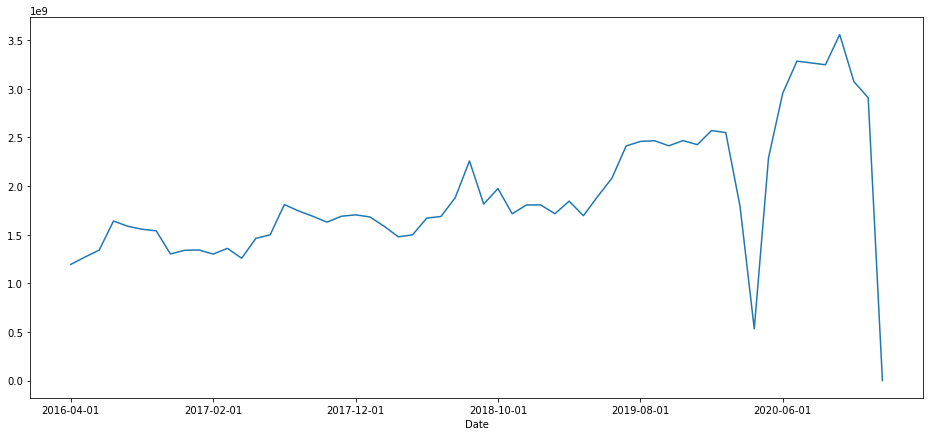

In [24]:
data['Sales'].plot(figsize = (16,7));

In [25]:
data['First Difference'] = data['Sales'] - data['Sales'].shift(1)

In [26]:
# By first Difference Data is Stationary
# So our d = 1
adf_check(data['First Difference'].dropna())


------Dickey Fuller Test Results---------

ADF Test Statistic : -7.667337529533889

p values : 1.6279511641240682e-11

#Lags used : 7

Number of Observations used : 49

Since the evidence is strong enough we reject the null hypothesis so time series is stationary


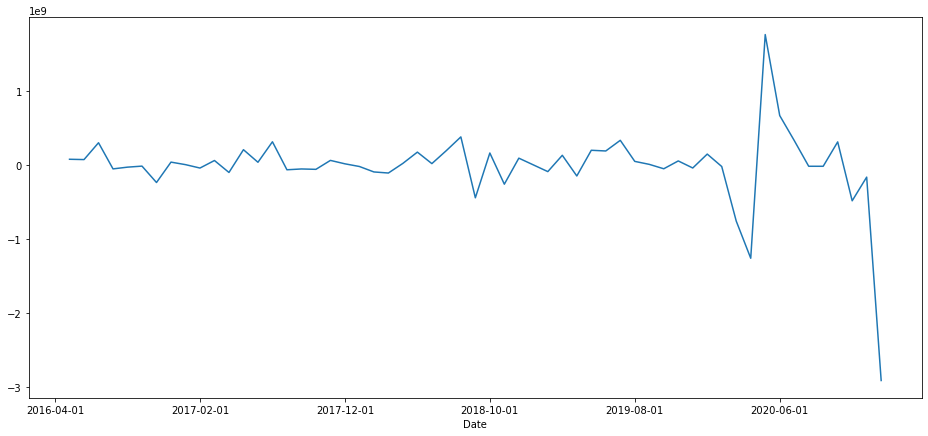

In [27]:
data['First Difference'].plot(figsize = (16,7));

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

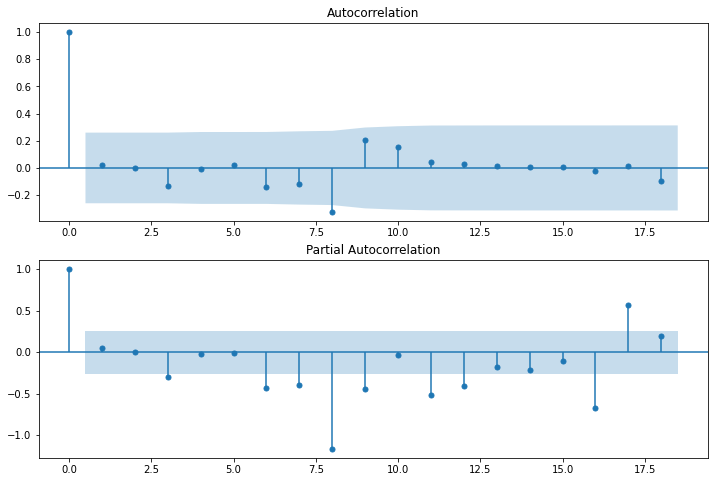

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['First Difference'].dropna(), ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['First Difference'].dropna(), ax= ax2 , method = 'ols')

In [30]:
data.head()

,Sales,First Difference
Date,,
2016-04-01,1.194274e+09,NaN
2016-05-01,1.270143e+09,7.586951e+07
2016-06-01,1.341825e+09,7.168160e+07
2016-07-01,1.640480e+09,2.986554e+08
2016-08-01,1.586615e+09,-5.386492e+07


## Model - 1(ARIMA)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(data['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Tirth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Tirth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1225.357
Method:                       css-mle   S.D. of innovations      524798986.453
Date:                Sat, 10 Jul 2021   AIC                           2458.714
Time:                        16:13:42   BIC                           2466.886
Sample:                    05-01-2016   HQIC                          2461.890
                         - 01-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.095e+07   7.38e+07     -0.284      0.776   -1.66e+08    1.24e+08
ar.L1.D.Sales     0.0482      1.133      0.043      0.966      -2.172       2.269
ma.L1.D.Sales     0.0024      1.116      0.002      0.998      -2.184       2.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           20.7566           +0.0000j           20.7566            0.0000
MA.1         -414.5920           +0.0000j          414.5920            0.5000
-----------------------------------------------------------------------------
"""

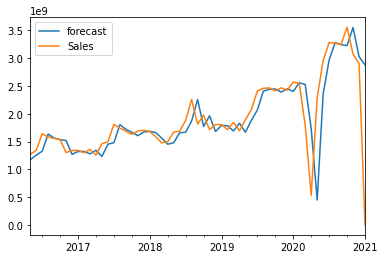

In [34]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [35]:
prediction = model_fit.predict(dynamic = False)

In [36]:
for i in range(len(prediction)):
    error = np.sqrt((prediction[i] - data.iloc[i , 0]) ** 2)
    print('Prediction- ' , prediction[i] , ' Real Data- ' , data.iloc[i , 0] , ' Error- ' , error)
print(np.sqrt((prediction - data['Sales']) ** 2).mean())

Prediction-  -20947703.69649127  Real Data-  1194273816.240002  Error-  1215221519.9364932
Prediction-  -16050377.856229573  Real Data-  1270143326.1899984  Error-  1286193704.046228
Prediction-  -16273456.53138882  Real Data-  1341824926.2999988  Error-  1358098382.8313875
Prediction-  -4790451.118641518  Real Data-  1640480370.9799998  Error-  1645270822.0986414
Prediction-  -22651936.710579585  Real Data-  1586615454.7099984  Error-  1609267391.420578
Prediction-  -21426514.500507712  Real Data-  1556121846.7599983  Error-  1577548361.2605062
Prediction-  -20723253.8592076  Real Data-  1539588012.4600003  Error-  1560311266.319208
Prediction-  -31910043.199082837  Real Data-  1301958528.5900013  Error-  1333868571.7890842
Prediction-  -17970255.187195383  Real Data-  1339343362.4899983  Error-  1357313617.6771936
Prediction-  -19719923.60222537  Real Data-  1342807137.9100006  Error-  1362527061.5122259
Prediction-  -22040958.711742595  Real Data-  1300307608.9699974  Error-  132234

In [180]:
# import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1))
# results=model.fit()

In [181]:
# results.summary()

In [182]:
# pred = results.get_prediction(start=pd.to_datetime('2016-06'), dynamic=False)
# pred_ci = pred.conf_int()

In [183]:
# ax = data['2020':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

# ax.set_xlabel('Date')
# ax.set_ylabel('Sales')
# plt.legend()

# plt.show()

In [38]:
!pip install pmdarima

-----------------------------------------------------Automate ARIMA model------------------------------------------------------ 

## Model - 2(Auto Arima)

In [39]:
import pmdarima as pm
model = pm.auto_arima(data['Sales'] , start_p=1, start_q=1,
                      d = None ,  # let model determine 'd'
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, max_d=2,  # maximum p and q
                      m=1,              # frequency of series
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2500.568, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2651.384, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2498.653, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2611.072, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2500.488, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2502.544, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2493.146, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2524.313, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2493.750, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2494.364, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2504.634, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2496.040, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.660 seconds


In [40]:
model=ARIMA(data['Sales'].dropna(),order=(1,0,0))
model_fit=model.fit()

C:\Users\Tirth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   58
Model:                     ARMA(1, 0)   Log Likelihood               -1243.679
Method:                       css-mle   S.D. of innovations      493871290.431
Date:                Sat, 10 Jul 2021   AIC                           2493.357
Time:                        16:15:02   BIC                           2499.539
Sample:                    04-01-2016   HQIC                          2495.765
                         - 01-01-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.897e+09   2.16e+08      8.800      0.000    1.47e+09    2.32e+09
ar.L1.Sales     0.7085      0.104      6.795      0.000       0.504       0.913
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4114           +0.0000j            1.4114            0.0000
-----------------------------------------------------------------------------
"""

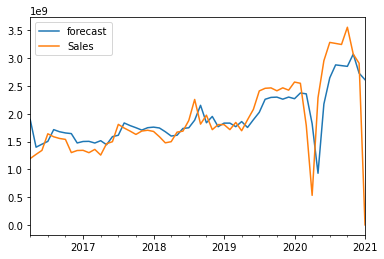

In [42]:
prediction = model_fit.plot_predict(dynamic=False)
plt.show()

In [43]:
prediction = model_fit.predict(dynamic = False)

In [45]:
pred = []
dataset = []
for i in range(len(prediction)):
    error = np.sqrt((prediction[i] - data.iloc[i , 0]) ** 2)
    pred.append(prediction[i])
    dataset.append(data.iloc[i , 0])
    print('Prediction- ' , prediction[i] , ' Real Data- ' , data.iloc[i , 0] , ' Error- ' , error)
error = (np.sqrt((prediction - data['Sales']) ** 2)/data['Sales']).median()
print(error)

Prediction-  1896765659.6462054  Real Data-  1194273816.240002  Error-  702491843.4062035
Prediction-  1399027061.4883094  Real Data-  1270143326.1899984  Error-  128883735.298311
Prediction-  1452783107.0280466  Real Data-  1341824926.2999988  Error-  110958180.72804785
Prediction-  1503571880.5737572  Real Data-  1640480370.9799998  Error-  136908490.4062426
Prediction-  1715179095.3229983  Real Data-  1586615454.7099984  Error-  128563640.61299992
Prediction-  1677014028.8303754  Real Data-  1556121846.7599983  Error-  120892182.07037711
Prediction-  1655408303.7016451  Real Data-  1539588012.4600003  Error-  115820291.24164486
Prediction-  1643693537.7810144  Real Data-  1301958528.5900013  Error-  341735009.1910131
Prediction-  1475325225.333512  Real Data-  1339343362.4899983  Error-  135981862.84351373
Prediction-  1501813610.9175005  Real Data-  1342807137.9100006  Error-  159006473.00749993
Prediction-  1504267809.83535  Real Data-  1300307608.9699974  Error-  203960200.865352

In [47]:
print(len(pred))
print(dataset)

58
[1194273816.240002, 1270143326.1899984, 1341824926.2999988, 1640480370.9799998, 1586615454.7099984, 1556121846.7599983, 1539588012.4600003, 1301958528.5900013, 1339343362.4899983, 1342807137.9100006, 1300307608.9699974, 1359373403.4599993, 1257297229.1299968, 1462239316.1499975, 1497758313.6200013, 1809614020.6000018, 1743763714.1899955, 1688828323.879999, 1628883447.3099978, 1689478075.7900019, 1703976987.740002, 1682350997.6500053, 1587320817.2800064, 1477604841.13, 1498013437.3099983, 1670238261.1900022, 1687476666.3399985, 1880477026.3599985, 2258188568.089997, 1814462180.4599965, 1974995046.3099964, 1714847756.449997, 1805645796.4300005, 1805866661.4400003, 1715323762.8700044, 1844769013.7999997, 1695223053.5100007, 1892429530.940001, 2080197656.7599995, 2411675735.8399987, 2458976401.9199977, 2466190553.0699964, 2413946637.4200034, 2467337007.0399985, 2425512879.169997, 2571286406.7699924, 2549231413.929997, 1791478571.7799985, 532260216.75000006, 2290032828.3699975, 295544772

In [84]:
dataset.append(0)
pred.append(0)

In [85]:
dictionary = {'Date' : dates , 'Prediction' : pred , 'Sales' : dataset}
dataframe = pd.DataFrame(dictionary)

In [86]:
dataframe.head()

,Date,Prediction,Sales
0,2016-04-01,1.896766e+09,1.194274e+09
1,2016-05-01,1.399027e+09,1.270143e+09
2,2016-06-01,1.452783e+09,1.341825e+09
3,2016-07-01,1.503572e+09,1.640480e+09
4,2016-08-01,1.715179e+09,1.586615e+09


In [89]:
import tensorflow as tf
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [90]:
upper , lower = upper_lower(dataset , pred)

In [92]:
dictionary = {'Date' : dates , 'Prediction' : pred , 'Sales' : dataset , 'Upper' : upper , 'Lower' : lower}
dataframe = pd.DataFrame(dictionary)
dataframe.head()

,Date,Prediction,Sales,Upper,Lower
0,2016-04-01,1.896766e+09,1.194274e+09,2.086442e+09,1.707089e+09
1,2016-05-01,1.399027e+09,1.270143e+09,1.538930e+09,1.259124e+09
2,2016-06-01,1.452783e+09,1.341825e+09,1.598061e+09,1.307505e+09
3,2016-07-01,1.503572e+09,1.640480e+09,1.653929e+09,1.353215e+09
4,2016-08-01,1.715179e+09,1.586615e+09,1.886697e+09,1.543661e+09


In [99]:
import matplotlib.pyplot as plt
# Create a function to plot time series data
def plot_time_series(timesteps, values , color , format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(False)

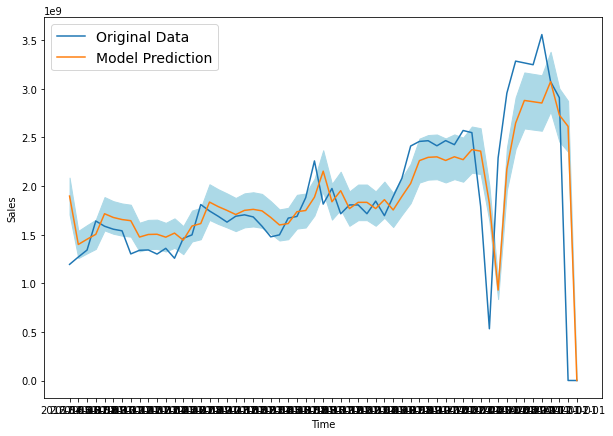

In [100]:
fig = plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = dates , values = dataset , format="-", label="Original Data" , color = 'orange')
plot_time_series(timesteps = dates , values = pred , format="-", label="Model Prediction" , color = '#0E83C5')
plt.fill_between(x = dates , y1 = upper , y2 = lower , color = '#ACD9E7')
plt.ylabel('Sales')
fig.savefig("ARIMA.png")

In [190]:
sale = np.zeros(shape = (11) , dtype = np.float64)
future_date = [['2021-02-01' , '2021-03-01' , '2021-04-01' , '2021-05-01' , '2021-06-01' , '2021-07-01' , 
              '2021-08-01' , '2021-09-01' , '2021-10-01' , '2021-11-01' , '2021-12-01'] , sale]
new_data = pd.DataFrame(future_date)
new_data = new_data.transpose()
new_data.columns = ['Date' , 'Sales']
new_data.head()

,Date,Sales
0,2021-02-01,0
1,2021-03-01,0
2,2021-04-01,0
3,2021-05-01,0
4,2021-06-01,0


In [191]:
data.drop('First Difference' , axis = 1 , inplace = True)

In [192]:
new_data.set_index('Date', inplace= True)

In [193]:
future_data=pd.concat([data , new_data])

In [194]:
future_data.tail()

,Sales
Date,
2021-08-01,0
2021-09-01,0
2021-10-01,0
2021-11-01,0
2021-12-01,0


In [195]:
future_data.shape

(69, 1)

In [196]:
future_data['forecast']=model_fit.predict(start=59,end=69,dynamic=True)
future_data[['Sales','forecast']].plot(figsize=(12,8)) 
# data[['avg monthly busride', 'ARMA_forecast']].plot(figsize=(8, 5))

ValueError: could not broadcast input array from shape (0) into shape (1)

In [ ]:
dataset = pd.concat([data])

In [ ]:
new_data['Predict'] = model_fit.predict()

--------------------------------------------------Automate Sarimax model-------------------------------------------------------

### Model - 3 (Sarimax)

In [45]:
smodel = pm.auto_arima(data['Sales'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=1912.370, Time=0.24 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1924.867, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1916.718, Time=0.24 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1910.430, Time=0.18 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=1909.240, Time=0.04 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=1910.098, Time=0.17 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=1912.086, Time=0.22 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=1911.050, Time=0.06 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=1911.988, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1916.568, Time=0.02 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=1913.566, Time=0.10 sec
 ARIMA(0,2,1)(0,1,0)[12] intercept   : AIC=1916.688, Time=0.03 sec

Best model:  ARIMA(0,2,1)(0,1,0)[12]          
Total fit time: 1.388 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   58
Model:             SARIMAX(0, 2, 1)x(0, 1, [], 12)   Log Likelihood                -952.620
Date:                             Tue, 15 Jun 2021   AIC                           1909.240
Time:                                     11:19:05   BIC                           1912.808
Sample:                                          0   HQIC                          1910.563
                                              - 58                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9665      0.171     -5.650      0.000      -1.302      -0.631
sigma2      4.457e+17   1.99e-19   2.23e+36      0.000    4.46e+17    4.46e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               347.65
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              41.19   Skew:                            -2.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+52. Standard errors may be unstable.
"""

In [46]:
train = data[:(len(data) - 11)]
test = data[(len(data) - 11):]

In [48]:
model = sm.tsa.statespace.SARIMAX(train['Sales'] , order = (0,2,1) , seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   47
Model:             SARIMAX(0, 2, 1)x(0, 1, [], 12)   Log Likelihood                -680.802
Date:                             Tue, 15 Jun 2021   AIC                           1365.604
Time:                                     11:25:18   BIC                           1368.597
Sample:                                 04-01-2016   HQIC                          1366.611
                                      - 02-01-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9725      0.287     -3.391      0.001      -1.535      -0.410
sigma2      7.797e+16   1.5

C:\Users\Tirth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Tirth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.plot_diagnostics(figsize = (15 , 9))
plt.show()

In [ ]:
test.head()

In [ ]:
forecast = model_fit.get_prediction(start = pd.to_datetime('2020-04-01') , dynamic = False)
prediction = forecast.predicted_mean

actual = test['2020-04-01':]
rmse = np.sqrt((prediction - actual['Sales']) ** 2).mean()
# for i in range(len(prediction)):
#     print('Prediction %.2f' %prediction[i])
#     print('Original %.2f' %actual[])
print(rmse)